<a href="https://colab.research.google.com/github/iskra3138/RL/blob/main/MRP_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# I.MRP

cs234 Mars Rover Example

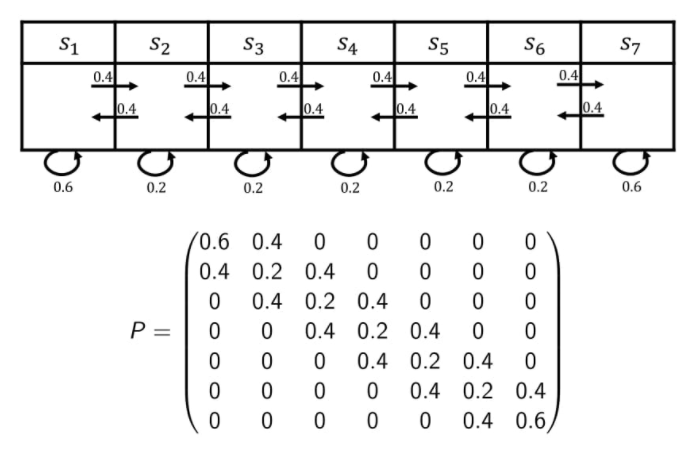

In [2]:
MRP_P = np.array ([[0.6,0.4,0,0,0,0,0],
               [0.4,0.2,0.4,0,0,0,0],
               [0,0.4,0.2,0.4,0,0,0],
               [0,0,0.4,0.2,0.4,0,0],
               [0,0,0,0.4,0.2,0.4,0],
               [0,0,0,0,0.4,0.2,0.4],
               [0,0,0,0,0,0.4,0.6]])

In [3]:
MRP_R = np.array([1,0,0,0,0,0,10]).reshape((7,1))

## 1. Simulation Based Method

In [6]:
num_state_space = 7
gamma = 0.5

for n in range(num_state_space):
  Returns = []
  for i in range(1000):
    state = n
    Return = MRP_R[state][0]
    for j in range(4) :
      next_state = np.random.choice(7, 1, p=MRP_P[state])[0]
      Return += gamma**(1+j) * MRP_R[next_state][0]
      state = next_state
    Returns.append(Return)
  print (sum(Returns)/len(Returns))

1.493875
0.332
0.0901875
0.1198125
0.700125
3.425
14.81625


## 2. 수리적인 방법

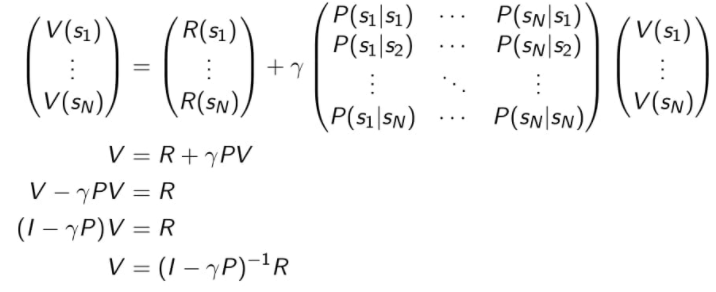

In [7]:
I = np.identity(num_state_space)
gamma = 0.5

np.matmul(np.linalg.inv(I - gamma * MRP_P), MRP_R)

array([[ 1.53426666],
       [ 0.3699333 ],
       [ 0.13043318],
       [ 0.21701603],
       [ 0.84613895],
       [ 3.59060924],
       [15.31160264]])

## 3. Dynamic Programming

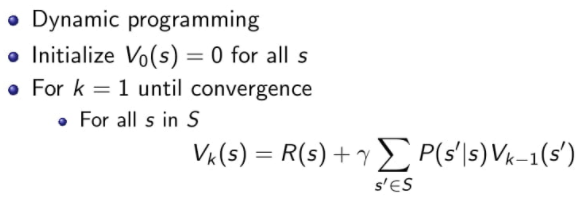

In [8]:
V = np.zeros_like(MRP_R)

while True:
  new_V = MRP_R + gamma* np.matmul(MRP_P,V)
  if (new_V == V).all() :
    break
  else :
    V = new_V.copy()
print (new_V)

[[ 1.53426666]
 [ 0.3699333 ]
 [ 0.13043318]
 [ 0.21701603]
 [ 0.84613895]
 [ 3.59060924]
 [15.31160264]]


# II. MDP

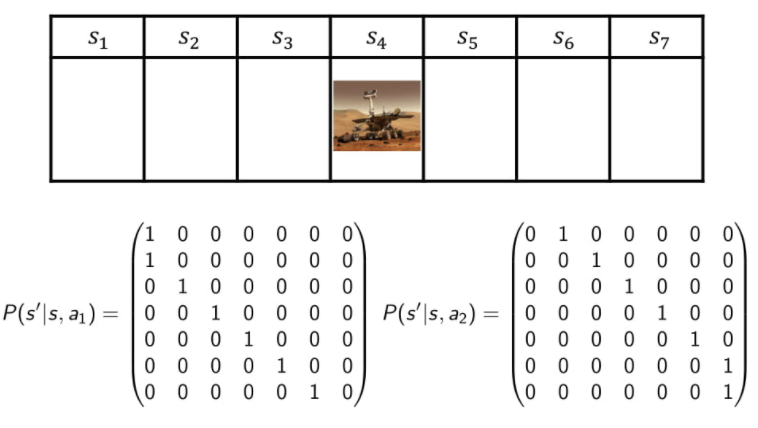

In [9]:
# P(s'|s,a1)
P1 = np.array ([[1,0,0,0,0,0,0],
               [1,0,0,0,0,0,0],
               [0,1,0,0,0,0,0],
               [0,0,1,0,0,0,0],
               [0,0,0,1,0,0,0],
               [0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0]])

In [10]:
# P(s'|s,a2)
P2 = np.array ([[0,1,0,0,0,0,0],
               [0,0,1,0,0,0,0],
               [0,0,0,1,0,0,0],
               [0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0],
               [0,0,0,0,0,0,1],
               [0,0,0,0,0,0,1]])

action a를 선택할 확률이 모두 동일하다면, 즉 $\pi(a|s) =0.5$

In [11]:
P = 0.5*P1 + 0.5*P2

In [12]:
P

array([[0.5, 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0.5]])

예제1

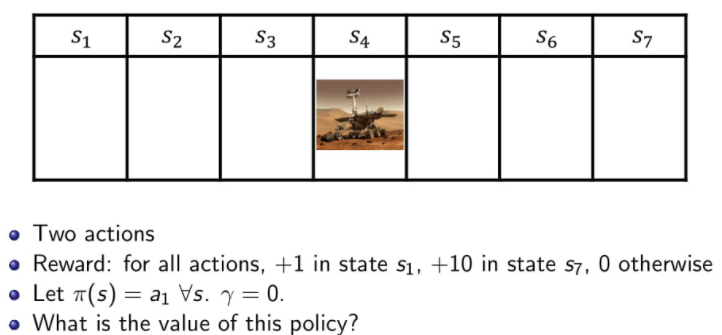

gamma가 0이므로 Reward가 Value가 됨

In [13]:
# R(s, a1)
R = np.array([1,0,0,0,0,0,10]).reshape((7,1))

In [14]:
R

array([[ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [10]])

예제 2

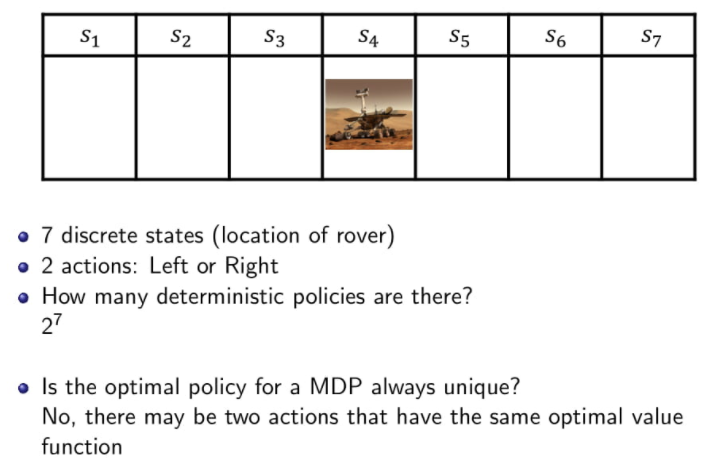

예제를 위한 P, R 정의

In [15]:
# P(s'|s,a1)
P1 = np.array ([[1,0,0,0,0,0,0],
               [1,0,0,0,0,0,0],
               [0,1,0,0,0,0,0],
               [0,0,1,0,0,0,0],
               [0,0,0,1,0,0,0],
               [0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0]])

In [16]:
# P(s'|s,a2)
P2 = np.array ([[0,1,0,0,0,0,0],
               [0,0,1,0,0,0,0],
               [0,0,0,1,0,0,0],
               [0,0,0,0,1,0,0],
               [0,0,0,0,0,1,0],
               [0,0,0,0,0,0,1],
               [0,0,0,0,0,0,1]])

In [18]:
# P(s,s',a) 형태로 변환
MDP_P = np.stack((P1,P2), axis=2)

In [19]:
# R(s,a1)
R1 = np.array([1,0,0,0,0,0,10]).reshape((7,1))
# R(s,a2)
R2 = np.array([1,0,0,0,0,0,10]).reshape((7,1))

In [20]:
# R(s,a) 형태로 변환
MDP_R = np.concatenate((R1,R2), axis=1)

Value Fn.구하는 함수 정의

In [21]:
def Bellman(R, P, gamma):
  V = np.zeros_like(R)
  while True:
    new_V = R + gamma* np.matmul(P,V)
    if (new_V == V).all() :
      break
    else :
      V = new_V
  return new_V

## 1. Brute Force

policy가 주어지면 MDP는 아래 식처럼 MRP로 바뀌게 되므로, 앞서 살펴본 방법들로 State Value 값을 구할 수 있음

- 전체 Policy에 대해 State Value값을 모두 구해보는 방법

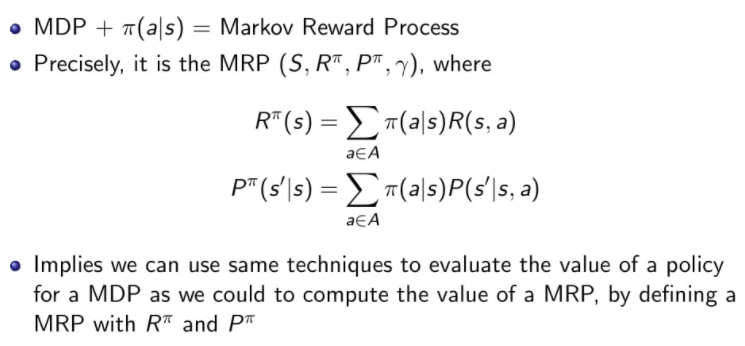

In [24]:
from itertools import product

num_state_space = 7
num_action_space = 2

MRP_P = np.zeros((num_state_space,num_state_space))
MRP_R = np.zeros((num_state_space,1))
gamma = 0.5

policies, returns = [], []
print ('Checking all policies')
for policy in product(range(num_action_space), repeat=num_state_space): #2^7가지의 action 중복순열 생성
  for i, action in enumerate(policy) : 
    MRP_P[i] = MDP_P[i,:,action]
    MRP_R[i] = MDP_R[i,action]
  # MRP
  total_return = np.sum(Bellman(MRP_R, MRP_P, gamma=gamma))
  policies.append(policy)
  returns.append(total_return)
  print (policy, total_return)

print ('\n\n ## To check uniqueness of optimal policy ')
print (np.sort(returns)[-5:])
max_num = np.argmax(returns)
print ('\n\n ## Optimal Poliy')
print (policies[max_num], returns[max_num])

Checking all policies
(0, 0, 0, 0, 0, 0, 0) 13.96875
(0, 0, 0, 0, 0, 0, 1) 23.9375
(0, 0, 0, 0, 0, 1, 0) 23.875
(0, 0, 0, 0, 0, 1, 1) 33.875
(0, 0, 0, 0, 1, 0, 0) 13.75
(0, 0, 0, 0, 1, 0, 1) 23.75
(0, 0, 0, 0, 1, 1, 0) 27.083333333333332
(0, 0, 0, 0, 1, 1, 1) 38.75
(0, 0, 0, 1, 0, 0, 0) 13.5
(0, 0, 0, 1, 0, 0, 1) 23.5
(0, 0, 0, 1, 0, 1, 0) 23.5
(0, 0, 0, 1, 0, 1, 1) 33.5
(0, 0, 0, 1, 1, 0, 0) 13.5
(0, 0, 0, 1, 1, 0, 1) 23.5
(0, 0, 0, 1, 1, 1, 0) 28.5
(0, 0, 0, 1, 1, 1, 1) 41.0
(0, 0, 1, 0, 0, 0, 0) 13.0
(0, 0, 1, 0, 0, 0, 1) 23.0
(0, 0, 1, 0, 0, 1, 0) 23.0
(0, 0, 1, 0, 0, 1, 1) 33.0
(0, 0, 1, 0, 1, 0, 0) 13.0
(0, 0, 1, 0, 1, 0, 1) 23.0
(0, 0, 1, 0, 1, 1, 0) 26.333333333333332
(0, 0, 1, 0, 1, 1, 1) 38.0
(0, 0, 1, 1, 0, 0, 0) 13.0
(0, 0, 1, 1, 0, 0, 1) 23.0
(0, 0, 1, 1, 0, 1, 0) 23.0
(0, 0, 1, 1, 0, 1, 1) 33.0
(0, 0, 1, 1, 1, 0, 0) 13.0
(0, 0, 1, 1, 1, 0, 1) 23.0
(0, 0, 1, 1, 1, 1, 0) 28.83333333333333
(0, 0, 1, 1, 1, 1, 1) 41.75
(0, 1, 0, 0, 0, 0, 0) 12.0
(0, 1, 0, 0, 0, 0, 1) 22.0
(0, 

## 2. Policy Improvement

Overall

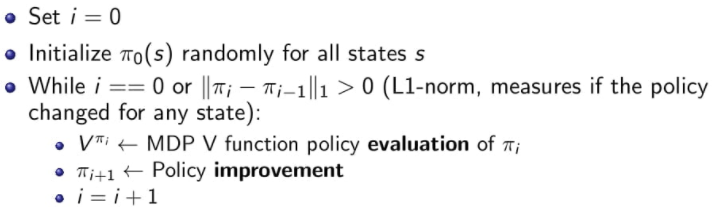

Policy Improvement 상세

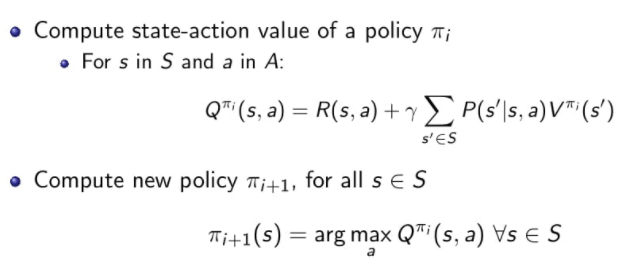

In [29]:
num_state_space = 7
num_action_space = 2
gamma = 0.5

MRP_P = np.zeros((num_state_space,num_state_space))
MRP_R = np.zeros((num_state_space,1))

policy = np.random.choice(num_action_space, num_state_space)
new_policy = np.zeros_like(policy)

while True :
  # 1) Policy Evaluation
  for i, action in enumerate(policy) : 
    MRP_P[i] = MDP_P[i,:,action]
    MRP_R[i] = MDP_R[i,action]
  # MRP 식을 이용해서 Value Fn. 값 구하기
  V = (Bellman(MRP_R, MRP_P, gamma=gamma))
  print (policy, V.reshape(7))

  # 2) Policy Improvement
  for s in range(num_state_space):
    Q_values =[]
    for a in range(num_action_space):
      Q = MDP_R[s,a] + gamma * np.sum(np.matmul(MDP_P[s,:,a],V))
      print (s,',',a,': ',Q,'=',MDP_R[s,a],'+', gamma,'*',np.sum(np.matmul(MDP_P[s,:,a],V)))
      Q_values.append(Q)
    new_policy[s] = np.argmax(Q_values)
  if (policy==new_policy).all() :
    break
  else :
    policy = new_policy.copy()

print ('Optimal Policy')
print (new_policy, V.sum())

[1 0 0 1 0 1 1] [ 1.33333333  0.66666667  0.33333333  0.          0.         10.
 20.        ]
0 , 0 :  1.6666666666666665 = 1 + 0.5 * 1.3333333333333333
0 , 1 :  1.3333333333333333 = 1 + 0.5 * 0.6666666666666666
1 , 0 :  0.6666666666666666 = 0 + 0.5 * 1.3333333333333333
1 , 1 :  0.16666666666666666 = 0 + 0.5 * 0.3333333333333333
2 , 0 :  0.3333333333333333 = 0 + 0.5 * 0.6666666666666666
2 , 1 :  0.0 = 0 + 0.5 * 0.0
3 , 0 :  0.16666666666666666 = 0 + 0.5 * 0.3333333333333333
3 , 1 :  0.0 = 0 + 0.5 * 0.0
4 , 0 :  0.0 = 0 + 0.5 * 0.0
4 , 1 :  5.0 = 0 + 0.5 * 10.0
5 , 0 :  0.0 = 0 + 0.5 * 0.0
5 , 1 :  10.0 = 0 + 0.5 * 20.0
6 , 0 :  15.0 = 10 + 0.5 * 10.0
6 , 1 :  20.0 = 10 + 0.5 * 20.0
[0 0 0 0 1 1 1] [ 2.    1.    0.5   0.25  5.   10.   20.  ]
0 , 0 :  2.0 = 1 + 0.5 * 2.0
0 , 1 :  1.5 = 1 + 0.5 * 1.0
1 , 0 :  1.0 = 0 + 0.5 * 2.0
1 , 1 :  0.25 = 0 + 0.5 * 0.5
2 , 0 :  0.5 = 0 + 0.5 * 1.0
2 , 1 :  0.125 = 0 + 0.5 * 0.25
3 , 0 :  0.25 = 0 + 0.5 * 0.5
3 , 1 :  2.5 = 0 + 0.5 * 5.0
4 , 0 :  0.

## Value Iteration

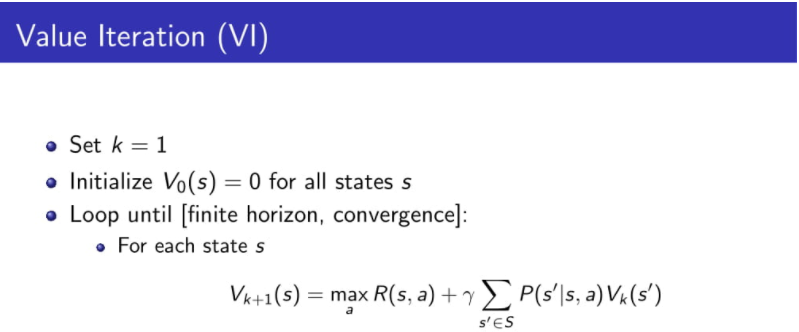

In [28]:
num_state_space = 7
num_action_space = 2

V = np.zeros((num_state_space,1))
new_V = np.zeros_like(V)

max_k = 1000
gamma = 0.5

for _ in range(max_k) :
  values = []
  policy = []
  for action in range(num_action_space) :
    values.append(MDP_R[:,action].reshape(num_state_space,1) + gamma * np.matmul(MDP_P[:,:,action],V))
  values = np.array(values)
  for state in range(num_state_space) :
    new_V[state] = np.round(np.max(values[:,state]),3) # 빠른 수렴을 위해 소수점 3자리까지만 비교
    policy.append(np.argmax(values[:,state]))
  if (V==new_V).all() :
    break
  else :
    V = new_V.copy()
    print (policy, V.reshape(num_state_space))

[0, 0, 0, 0, 0, 0, 0] [ 1.  0.  0.  0.  0.  0. 10.]
[0, 0, 0, 0, 0, 1, 1] [ 1.5  0.5  0.   0.   0.   5.  15. ]
[0, 0, 0, 0, 1, 1, 1] [ 1.75  0.75  0.25  0.    2.5   7.5  17.5 ]
[0, 0, 0, 1, 1, 1, 1] [ 1.875  0.875  0.375  1.25   3.75   8.75  18.75 ]
[0, 0, 1, 1, 1, 1, 1] [ 1.938  0.938  0.625  1.875  4.375  9.375 19.375]
[0, 0, 1, 1, 1, 1, 1] [ 1.969  0.969  0.938  2.188  4.688  9.688 19.688]
[0, 0, 1, 1, 1, 1, 1] [ 1.985  0.984  1.094  2.344  4.844  9.844 19.844]
[0, 0, 1, 1, 1, 1, 1] [ 1.993  0.992  1.172  2.422  4.922  9.922 19.922]
[0, 0, 1, 1, 1, 1, 1] [ 1.997  0.996  1.211  2.461  4.961  9.961 19.961]
[0, 0, 1, 1, 1, 1, 1] [ 1.998  0.998  1.23   2.48   4.98   9.98  19.98 ]
[0, 0, 1, 1, 1, 1, 1] [ 1.999  0.999  1.24   2.49   4.99   9.99  19.99 ]
[0, 0, 1, 1, 1, 1, 1] [ 2.     1.     1.245  2.495  4.995  9.995 19.995]
[0, 0, 1, 1, 1, 1, 1] [ 2.     1.     1.248  2.498  4.998  9.998 19.998]
[0, 0, 1, 1, 1, 1, 1] [ 2.     1.     1.249  2.499  4.999  9.999 19.999]
[0, 0, 1, 1, 1, 1, 1